# Predict Bike Sharing Demand with AutoGluon

## Project: Predict Bike Sharing Demand with AutoGluon
This notebook is a template with each step that you need to complete for the project.

Please fill in your code where there are explicit `?` markers in the notebook. You are welcome to add more cells and code as you see fit.

Once you have completed all the code implementations, please export your notebook as a HTML file so the reviews can view your code. Make sure you have all outputs correctly outputted.

`File-> Export Notebook As... -> Export Notebook as HTML`

There is a writeup to complete as well after all code implememtation is done. Please answer all questions and attach the necessary tables and charts. You can complete the writeup in either markdown or PDF.

Completing the code template and writeup template will cover all of the rubric points for this project.

The rubric contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this notebook and also discuss the results in the writeup file.

## Step 1: Create an account with Kaggle

### Create Kaggle Account and download API key
Below is example of steps to get the API username and key. Each student will have their own username and key.

1. Open account settings.
2. Scroll down to API and click Create New API Token.
3. Open up `kaggle.json` and use the username and key.

## Step 2: Download the Kaggle dataset using the kaggle python library

### Open up Sagemaker Studio and use starter template

1. Notebook should be using a `ml.t3.medium` instance (2 vCPU + 4 GiB)
2. Notebook should be using kernal: `Python 3 (MXNet 1.8 Python 3.7 CPU Optimized)`

### Install packages

In [1]:
!pip install -U pip
!pip install -U setuptools wheel
!pip install -U "mxnet<2.0.0" bokeh==2.0.1
!pip install autogluon --no-cache-dir
# Without --no-cache-dir, smaller aws instances may have trouble installing

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 76.9 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 22.0.4
    Uninstalling pip-22.0.4:
      Successfully uninstalled pip-22.0.4
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 54.8 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 57.4.0
    Uninstalling setuptools-57.4.0:
      Successfully uninstalled setuptools-57.4.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.9.0 requires jedi>=0.10, which is not installed.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simpl

### Setup Kaggle API Key

In [2]:
# create the .kaggle directory and an empty kaggle.json file
!mkdir -p /root/.kaggle
!touch /root/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

In [3]:
# Fill in your user name and key from creating the kaggle account and API token file
import json
kaggle_username = "varaah"
kaggle_key = "a5cfad6ad0ab9d44af98c92e7f5200a4"

# Save API token the kaggle.json file
with open("/root/.kaggle/kaggle.json", "w") as f:
    f.write(json.dumps({"username": kaggle_username, "key": kaggle_key}))

In [4]:
# Mount gdrive
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [5]:
# Import additional libraries
import matplotlib.pyplot as plt

### Download and explore dataset

### Go to the bike sharing demand competition and agree to the terms

In [6]:
# Download the dataset, it will be in a .zip file so you'll need to unzip it as well.
!kaggle competitions download -c bike-sharing-demand
# If you already downloaded it you can use the -o command to overwrite the file
!unzip -o bike-sharing-demand.zip -d "gdrive/My Drive/Colab Notebooks/Udacity/Project/01 Predict Bike Sharing Demand with AutoGluon/project/dataset/"

  0% 0.00/189k [00:00<?, ?B/s]
100% 189k/189k [00:00<00:00, 30.6MB/s]
Archive:  bike-sharing-demand.zip
  inflating: gdrive/My Drive/Colab Notebooks/Udacity/Project/01 Predict Bike Sharing Demand with AutoGluon/project/dataset/sampleSubmission.csv  
  inflating: gdrive/My Drive/Colab Notebooks/Udacity/Project/01 Predict Bike Sharing Demand with AutoGluon/project/dataset/test.csv  
  inflating: gdrive/My Drive/Colab Notebooks/Udacity/Project/01 Predict Bike Sharing Demand with AutoGluon/project/dataset/train.csv  


In [7]:
import pandas as pd
from autogluon.tabular import TabularPredictor

In [8]:
# Create the train dataset in pandas by reading the csv
train = pd.read_csv("gdrive/My Drive/Colab Notebooks/Udacity/Project/01 Predict Bike Sharing Demand with AutoGluon/project/dataset/train.csv")

In [9]:
# See data type of each columns
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [10]:
# Set the parsing of the datetime column so you can use some of the `dt` features in pandas later
train["datetime"] = pd.to_datetime(train["datetime"])

print(train.info())
train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB
None


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [11]:
# Simple output of the train dataset to view some of the min/max/varition of the dataset features.
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [12]:
# Create the test pandas dataframe in pandas by reading the csv, remember to parse the datetime!
test = pd.read_csv("gdrive/My Drive/Colab Notebooks/Udacity/Project/01 Predict Bike Sharing Demand with AutoGluon/project/dataset/test.csv")

In [13]:
# Parse the datetime
test["datetime"] = pd.to_datetime(test["datetime"])

print(test.info())
test.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    6493 non-null   datetime64[ns]
 1   season      6493 non-null   int64         
 2   holiday     6493 non-null   int64         
 3   workingday  6493 non-null   int64         
 4   weather     6493 non-null   int64         
 5   temp        6493 non-null   float64       
 6   atemp       6493 non-null   float64       
 7   humidity    6493 non-null   int64         
 8   windspeed   6493 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(5)
memory usage: 456.7 KB
None


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [14]:
# Same thing as train and test dataset
submission = pd.read_csv("gdrive/My Drive/Colab Notebooks/Udacity/Project/01 Predict Bike Sharing Demand with AutoGluon/project/dataset/sampleSubmission.csv")

In [15]:
# Parse the datetime
submission["datetime"] = pd.to_datetime(submission["datetime"])

print(submission.info())
submission.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   datetime  6493 non-null   datetime64[ns]
 1   count     6493 non-null   int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 101.6 KB
None


,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


## Step 3: Train a model using AutoGluon’s Tabular Prediction

Requirements:
* We are prediting `count`, so it is the label we are setting.
* Ignore `casual` and `registered` columns as they are also not present in the test dataset. 
* Use the `root_mean_squared_error` as the metric to use for evaluation.
* Set a time limit of 10 minutes (600 seconds).
* Use the preset `best_quality` to focus on creating the best model.

In [16]:
predictor = TabularPredictor(label="count",
                             eval_metric="root_mean_squared_error").fit(
                                 train_data=train.loc[:, ~train.columns.isin(["casual", "registered"])],
                                 time_limit=600,
                                 presets="best_quality")

No path specified. Models will be saved in: "AutogluonModels/ag-20230108_013037/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20230108_013037/"
AutoGluon Version:  0.6.1
Python Version:     3.8.16
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Sat Dec 10 16:00:40 UTC 2022
Train Data Rows:    10886
Train Data Columns: 9
Label Column: count
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 191.57413, 181.14445)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Fea

### Review AutoGluon's training run with ranking of models that did the best.

In [17]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -52.840189      10.337088  534.874485                0.000736           0.261573            3       True         17
1   RandomForestMSE_BAG_L2  -53.365984       8.786093  410.393272                0.549731          28.273104            2       True         13
2     ExtraTreesMSE_BAG_L2  -53.908287       8.743466  388.692555                0.507103           6.572387            2       True         15
3          LightGBM_BAG_L2  -55.177348       8.407965  400.362777                0.171602          18.242609            2       True         12
4          CatBoost_BAG_L2  -55.686561       8.287180  439.422138                0.050817          57.301970            2       True         14
5        LightGBMXT_BAG_L2  -60.126657      10.669998  421.556240         

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'XGBoost_BAG_L1': 'StackerEnsembleModel_XGBoost',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L2': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L2': 'StackerEnsembleModel_NNFastAiTabular',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -101.546199084

                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -52.840189      10.337088  534.874485                0.000736           0.261573            3       True         17
1   RandomForestMSE_BAG_L2  -53.365984       8.786093  410.393272                0.549731          28.273104            2       True         13
2     ExtraTreesMSE_BAG_L2  -53.908287       8.743466  388.692555                0.507103           6.572387            2       True         15
3          LightGBM_BAG_L2  -55.177348       8.407965  400.362777                0.171602          18.242609            2       True         12
4          CatBoost_BAG_L2  -55.686561       8.287180  439.422138                0.050817          57.301970            2       True         14
5        LightGBMXT_BAG_L2  -60.126657      10.669998  421.556240                2.433636          39.436072            2       True    

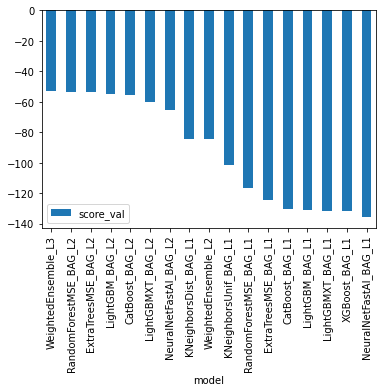

In [18]:
# Comparing model performance
predictor.leaderboard().plot(kind="bar", x="model", y="score_val")
plt.show()

### Create predictions from test dataset

In [19]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [20]:
predictions = predictor.predict(test)
predictions.head()

0    22.398695
1    41.601826
2    45.263538
3    48.364609
4    51.704906
Name: count, dtype: float32

#### NOTE: Kaggle will reject the submission if we don't set everything to be > 0.

In [21]:
# Describe the `predictions` series to see if there are any negative values
predictions.describe()

count    6493.000000
mean      100.939682
std        90.251015
min         3.072910
25%        21.297609
50%        62.905556
75%       171.453079
max       360.906036
Name: count, dtype: float64

The minimum value in predictions is 3.29, so there are no negative values in the predictions.

In [22]:
# How many negative values do we have?
len(predictions[predictions < 0])

0

In [23]:
# Set them to zero
predictions[predictions < 0] = 0

### Set predictions to submission dataframe, save, and submit

In [24]:
submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [25]:
submission["count"] = predictions
submission.to_csv("submission.csv", index=False)

In [ ]:
!kaggle competitions submit -c bike-sharing-demand -f submission.csv -m "first raw submission"

100% 188k/188k [00:01<00:00, 98.9kB/s]
Successfully submitted to Bike Sharing Demand

#### View submission via the command line or in the web browser under the competition's page - `My Submissions`

In [ ]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName        date                 description           status    publicScore  privateScore  
--------------  -------------------  --------------------  --------  -----------  ------------  
submission.csv  2023-01-05 15:28:30  first raw submission  complete  1.79530      1.79530       


#### Initial score of `1.79`.

## Step 4: Exploratory Data Analysis and Creating an additional feature
* Any additional feature will do, but a great suggestion would be to separate out the datetime into hour, day, or month parts.

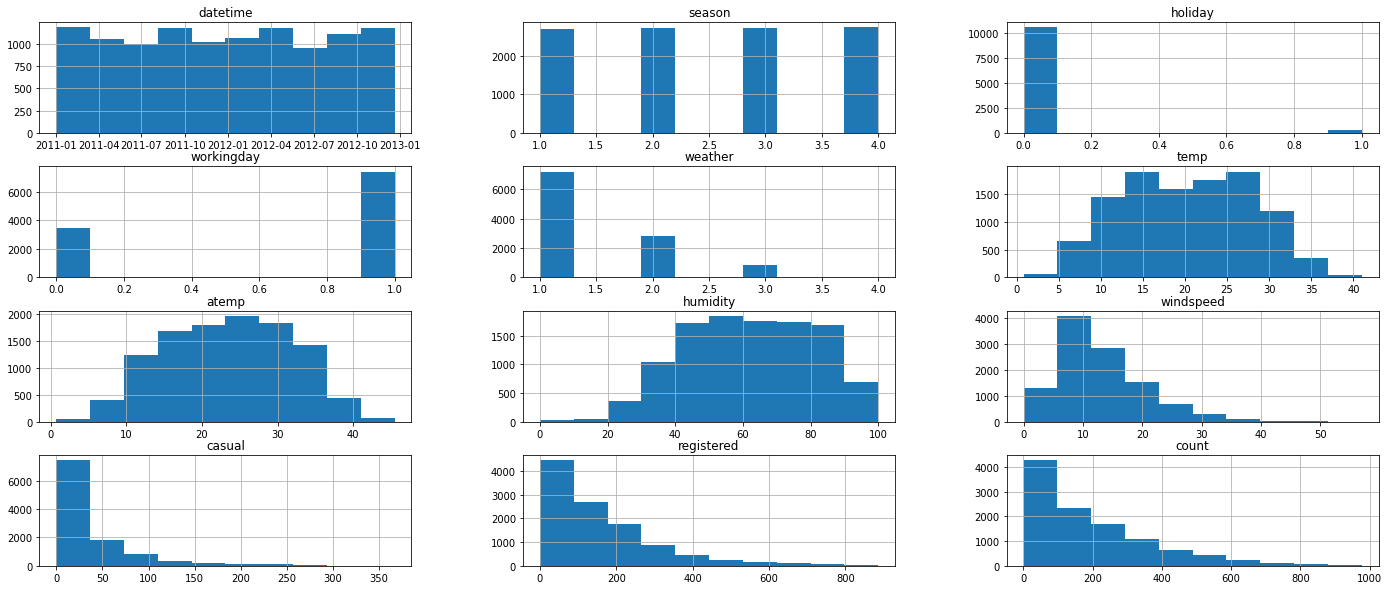

In [26]:
# Create a histogram of all features to show the distribution of each one relative to the data. This is part of the exploritory data analysis
train.hist(figsize=(24, 10))
plt.show()

In [27]:
# create a new feature
train["hour"] = train["datetime"].dt.hour
train["day"] = train["datetime"].dt.day
train["month"] = train["datetime"].dt.month

test["hour"] =  test["datetime"].dt.hour
test["day"] =  test["datetime"].dt.day
test["month"] =  test["datetime"].dt.month

In [28]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,day,month
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0,1,1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2,1,1
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3,1,1
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4,1,1


In [29]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,hour,day,month
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,0,20,1
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,1,20,1
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2,20,1
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,3,20,1
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,4,20,1


## Make category types for these so models know they are not just numbers
* AutoGluon originally sees these as ints, but in reality they are int representations of a category.
* Setting the dtype to category will classify these as categories in AutoGluon.

In [30]:
train["season"] = train["season"].astype("category")
train["weather"] = train["weather"].astype("category")
test["season"] = test["season"].astype("category")
test["weather"] = test["weather"].astype("category")

In [31]:
# View are new feature
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,day,month
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0,1,1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2,1,1
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3,1,1
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4,1,1


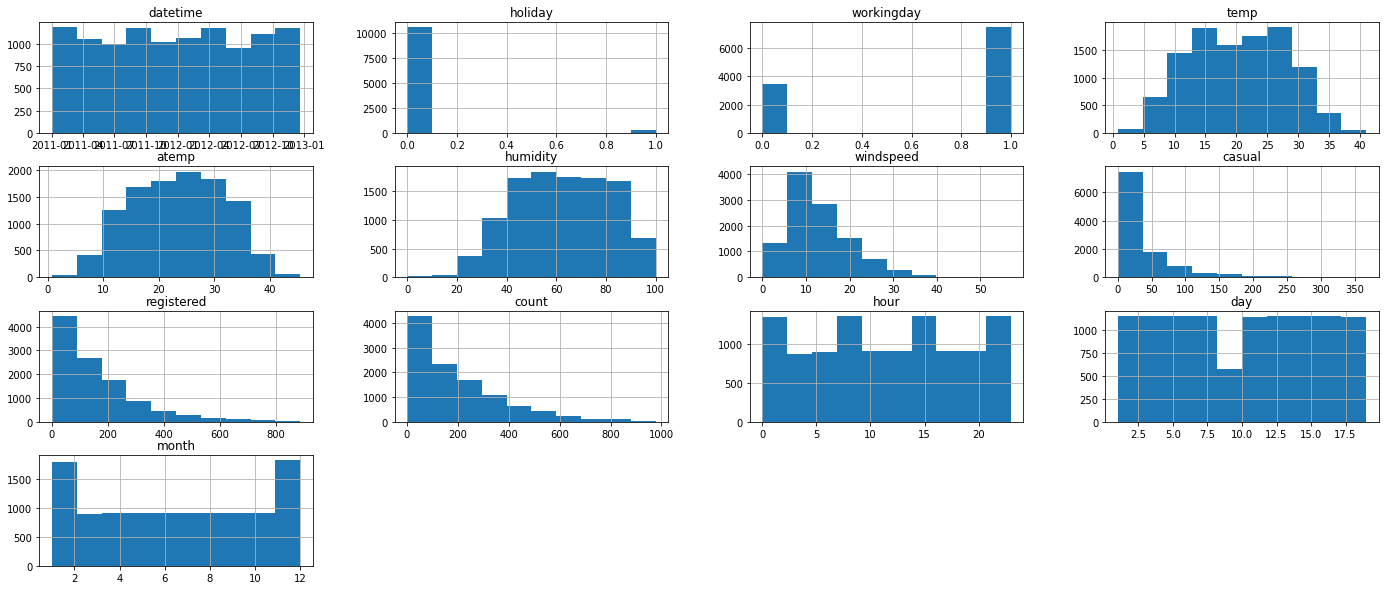

In [32]:
# View histogram of all features again now with the hour feature
train.hist(figsize=(24, 10))
plt.show()

## Step 5: Rerun the model with the same settings as before, just with more features

In [33]:
predictor_new_features = TabularPredictor(label="count",
                                          eval_metric="root_mean_squared_error").fit(
                                              train_data=train.loc[:, ~train.columns.isin(["casual", "registered"])],
                                              time_limit=600,
                                              presets="best_quality")

No path specified. Models will be saved in: "AutogluonModels/ag-20230108_020856/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20230108_020856/"
AutoGluon Version:  0.6.1
Python Version:     3.8.16
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Sat Dec 10 16:00:40 UTC 2022
Train Data Rows:    10886
Train Data Columns: 12
Label Column: count
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 191.57413, 181.14445)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Fe

In [34]:
predictor_new_features.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -30.134173      20.855084  537.745492                0.000736           0.366453            3       True         15
1          CatBoost_BAG_L2  -30.426582      19.483586  488.406000                0.098401          91.223305            2       True         13
2          LightGBM_BAG_L2  -30.547910      19.660688  416.849920                0.275503          19.667225            2       True         11
3        LightGBMXT_BAG_L2  -31.060506      19.932250  419.277078                0.547065          22.094383            2       True         10
4     ExtraTreesMSE_BAG_L2  -31.382217      19.933379  404.394127                0.548194           7.211432            2       True         14
5   RandomForestMSE_BAG_L2  -31.722547      19.920732  421.312038         

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L2': 'StackerEnsembleModel_XT',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -101.54619908446061,
  'KNeighborsDist_BAG_L1': -84.12506123181602,
  'LightGBMXT_BAG_L1': -34.520779536614505,
  'LightGBM_BAG_L1': -

In [35]:
predictions_new = predictor_new_features.predict(test)
predictions_new.head()

0    15.680243
1    11.369110
2    10.428021
3     9.173353
4     7.948615
Name: count, dtype: float32

In [36]:
# Check if there are negative values in the predictions with new features
predictions_new.describe()

count    6493.000000
mean      150.626770
std       129.699020
min         1.745136
25%        54.323792
50%       115.719353
75%       214.139130
max       815.859436
Name: count, dtype: float64

In [37]:
# Remember to set all negative values to zero
predictions_new[predictions_new < 0] = 0

In [38]:
# Create a new submission dataframe
submission_new_features = submission.copy()

In [39]:
# Same submitting predictions
submission_new_features["count"] = predictions_new
submission_new_features.to_csv("submission_new_features.csv", index=False)

In [ ]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_features.csv -m "new features"

100% 188k/188k [00:00<00:00, 996kB/s]
Successfully submitted to Bike Sharing Demand

In [ ]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description           status    publicScore  privateScore  
---------------------------  -------------------  --------------------  --------  -----------  ------------  
submission_new_features.csv  2023-01-06 15:07:00  new features          complete  0.64907      0.64907       
submission.csv               2023-01-05 15:28:30  first raw submission  complete  1.79530      1.79530       


#### New Score of `0.65`.

## Step 6: Hyper parameter optimization
* There are many options for hyper parameter optimization.
* Options are to change the AutoGluon higher level parameters or the individual model hyperparameters.
* The hyperparameters of the models themselves that are in AutoGluon. Those need the `hyperparameter` and `hyperparameter_tune_kwargs` arguments.

We'll specify hyperparameter values for several neural networks and tree-based models.

In [74]:
import autogluon.core as ag

# Specify hyperparameter values for neural network models
nn_params = {"num_epochs": 10, # number of training epochs
             "learning_rate": ag.space.Real(1e-4, 1e-2, default=5e-4, log=True), # learning rate
             "activation": ag.space.Categorical("relu", "softrelu", "tanh"), # activation function
             "dropout_prob": ag.space.Real(0.0, 0.5, default=0.1)} # dropout probability

# Specify hyperparameter values for lightGBM gradient boosted trees
gbm_params = {"num_boost_round": 100, # number of boosting round to control training time of GBM models
              "num_leaves": ag.space.Int(lower=26, upper=66, default=36)} # number of leaves in trees

# Specify hyperparameter values
hyperparameters = {"GBM": gbm_params,
                   "NN_TORCH": nn_params}

hyperparameter_tune_kwargs = {"num_trials": 5, # try at most 5 different hyperparameter configurations for each type of model
                              "scheduler": "local",
                              "searcher": "auto"}

In [75]:
predictor_new_hpo = TabularPredictor(label="count",
                                     eval_metric="root_mean_squared_error").fit(
                                         train_data=train.loc[:, ~train.columns.isin(["casual", "registered"])],
                                         time_limit=900,
                                         num_bag_sets=1,
                                         presets="best_quality",
                                         hyperparameters=hyperparameters,
                                         hyperparameter_tune_kwargs=hyperparameter_tune_kwargs
                                     )

Fitted model: NeuralNetTorch_BAG_L2/d3adda58 ...
	-44.1242	 = Validation score   (-root_mean_squared_error)
	40.49s	 = Training   runtime
	0.0s	 = Validation runtime
Fitting model: WeightedEnsemble_L3 ... Training model for up to 360.0s of the 596.0s of remaining time.
	-36.5359	 = Validation score   (-root_mean_squared_error)
	0.24s	 = Training   runtime
	0.0s	 = Validation runtime
AutoGluon training complete, total runtime = 304.29s ... Best model: "WeightedEnsemble_L3"
TabularPredictor saved. To load, use: predictor = TabularPredictor.load("AutogluonModels/ag-20230108_070108/")


In [76]:
predictor_new_hpo.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                             model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0              WeightedEnsemble_L3  -36.535910       0.001756  172.061620                0.000686           0.243428            3       True         13
1               LightGBM_BAG_L2/T2  -36.625906       0.000734  112.076222                0.000114          18.462179            2       True          8
2               LightGBM_BAG_L2/T3  -37.023025       0.000742  112.868840                0.000123          19.254798            2       True          9
3               LightGBM_BAG_L2/T1  -37.083204       0.000756  113.380300                0.000136          19.766257            2       True          7
4               LightGBM_BAG_L2/T5  -37.606216       0.000740  112.574823                0.000120          18.960780            2       True         11
5              WeightedEns

{'model_types': {'LightGBM_BAG_L1/T1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T3': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T4': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T5': 'StackerEnsembleModel_LGB',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBM_BAG_L2/T1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2/T2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2/T3': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2/T4': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2/T5': 'StackerEnsembleModel_LGB',
  'NeuralNetTorch_BAG_L2/d3adda58': 'StackerEnsembleModel_TabularNeuralNetTorch',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'LightGBM_BAG_L1/T1': -40.255448619289915,
  'LightGBM_BAG_L1/T2': -39.523075279905974,
  'LightGBM_BAG_L1/T3': -38.66005880156163,
  'LightGBM_BAG_L1/T4': -124.08524875753479,
  'LightGBM_BAG_L1/T5': -43.4368858066812,
  'WeightedEnsemble_L2': -38.4077037875

In [77]:
predictions_new_hpo = predictor_new_hpo.predict(test)
predictions_new_hpo.head()

0    9.868010
1    6.380240
2    6.249085
3    6.205734
4    6.205948
Name: count, dtype: float32

In [78]:
predictions_new_hpo.describe()

count    6493.000000
mean      192.351501
std       174.324539
min         4.928048
25%        45.185223
50%       149.182968
75%       288.159180
max       872.615234
Name: count, dtype: float64

In [79]:
# Remember to set all negative values to zero
predictions_new_hpo[predictions_new_hpo < 0] = 0

In [80]:
predictions_new_hpo.describe()

count    6493.000000
mean      192.351501
std       174.324539
min         4.928048
25%        45.185223
50%       149.182968
75%       288.159180
max       872.615234
Name: count, dtype: float64

In [81]:
submission_new_hpo = submission.copy()

# Same submitting predictions
submission_new_hpo["count"] = predictions_new_hpo
submission_new_hpo.to_csv("submission_new_hpo.csv", index=False)

In [82]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo.csv -m "new features with hyperparameters"

100% 188k/188k [00:00<00:00, 341kB/s]
Successfully submitted to Bike Sharing Demand

In [83]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                        status    publicScore  privateScore  
---------------------------  -------------------  ---------------------------------  --------  -----------  ------------  
submission_new_hpo.csv       2023-01-08 07:08:10  new features with hyperparameters  complete  0.48956      0.48956       
submission_new_hpo.csv       2023-01-08 03:51:08  new features with hyperparameters  complete  0.56793      0.56793       
submission_new_features.csv  2023-01-06 15:07:00  new features                       complete  0.64907      0.64907       
submission.csv               2023-01-05 15:28:30  first raw submission               complete  1.79530      1.79530       


#### New Score of `0.49`.

## Step 7: Write a Report
### Refer to the markdown file for the full report
### Creating plots and table for report

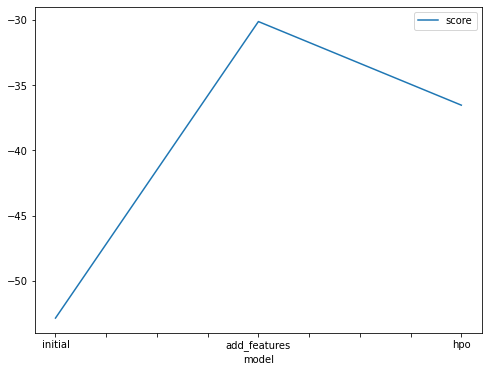

In [91]:
# Taking the top model score from each training run and creating a line plot to show improvement
# You can create these in the notebook and save them to PNG or use some other tool (e.g. google sheets, excel)
fig = pd.DataFrame(
    {
        "model": ["initial", "add_features", "hpo"],
        "score": [-52.840189, -30.134173, -36.535910]
    }
).plot(x="model", y="score", figsize=(8, 6)).get_figure()
fig.savefig('gdrive/My Drive/Colab Notebooks/Udacity/Project/01 Predict Bike Sharing Demand with AutoGluon/project/img/model_train_score.png')

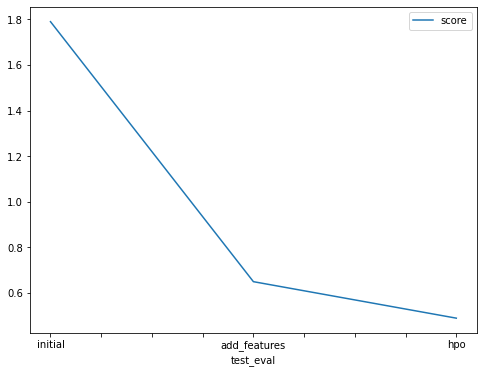

In [92]:
# Take the 3 kaggle scores and creating a line plot to show improvement
fig = pd.DataFrame(
    {
        "test_eval": ["initial", "add_features", "hpo"],
        "score": [1.79, 0.65, 0.49]
    }
).plot(x="test_eval", y="score", figsize=(8, 6)).get_figure()
fig.savefig('gdrive/My Drive/Colab Notebooks/Udacity/Project/01 Predict Bike Sharing Demand with AutoGluon/project/img/model_test_score.png')

### Hyperparameter table

In [90]:
# The 3 hyperparameters we tuned with the kaggle score as the result
pd.DataFrame({
    "model": ["initial", "add_features", "hpo"],
    "eval_metric": ["root_mean_squared_error", "root_mean_squared_error", "root_mean_squared_error"],
    "time_limit": [600, 600, 900],
    "presets": ["best_quality", "best_quality", "best_quality"],
    "num_bag_sets": [None, None, 1],
    "individual model parameters": [None, None, "Tune NN and GBM models"],
    "score": [1.79, 0.65, 0.49]
})

,model,eval_metric,time_limit,presets,num_bag_sets,individual model parameters,score
0,initial,root_mean_squared_error,600,best_quality,NaN,None,1.79
1,add_features,root_mean_squared_error,600,best_quality,NaN,None,0.65
2,hpo,root_mean_squared_error,900,best_quality,1.0,Tune NN and GBM models,0.49
